In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from __future__ import print_function
import numpy as np 
import os
import glob
import numpy as np 
import skimage.io as io
import skimage.transform as trans
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from tensorflow.keras.losses import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf
from PIL import Image
from time import time


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
#####################################################################################################################################
######################## THIS IS SENTINEL 2 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%########################
#####################################################################################################################################



def unet(input_size1 = (256,256,3),input_size2 = (256,256,3)):
    inputs1 = Input(input_size1)
    conv1 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(inputs1)
    conv1 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(pool1)
    conv2 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(pool2)
    conv3 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    #conv4 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(pool3)
    #conv4 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(conv4)
    #drop4 = Dropout(0.7)(conv4)
    #pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    inputs2 = Input(input_size2)
    conv1_2 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(inputs2)
    conv1_2 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(conv1_2)
    pool1_2 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
    conv2_2 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(pool1_2)
    conv2_2 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(conv2_2)
    pool2_2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)
    conv3_2 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(pool2_2)
    conv3_2 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(conv3_2)
    pool3_2 = MaxPooling2D(pool_size=(2, 2))(conv3_2)
    #conv4_2 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(pool3_2)
    #conv4_2 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(conv4_2)
    #drop4_2 = Dropout(0.7)(conv4_2)
    #pool4_2 = MaxPooling2D(pool_size=(2, 2))(drop4_2)

    merged = concatenate([pool3,pool3_2])

    conv5 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(merged)
    conv5 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(conv5)
    drop5 = Dropout(0.2)(conv5)

    #up6 = Conv2D(512, 2, activation = LeakyReLU() , padding = 'same')(UpSampling2D(size = (2,2))(drop5))
    #merge6 = concatenate([drop4,drop4_2,up6], axis = 3)
    #conv6 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(merge6)
    #conv6 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(conv6)

    up7 = Conv2D(256, 2, activation = LeakyReLU() , padding = 'same')(UpSampling2D(size = (2,2))(drop5))
    merge7 = concatenate([conv3,conv3_2,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(merge7)
    conv7 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(conv7)

    up8 = Conv2D(128, 2, activation = LeakyReLU() , padding = 'same')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,conv2_2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(merge8)
    conv8 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(conv8)

    up9 = Conv2D(64, 2, activation = LeakyReLU() , padding = 'same', )(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,conv1_2,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(merge9)
    conv9 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(conv9)
    conv9 = Conv2D(2, 3, activation = LeakyReLU() , padding = 'same')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model([inputs1,inputs2],conv10)
  
    model.compile(optimizer =  tf.keras.optimizers.Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    #optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
    #Adam(lr = 1e-4)
    model.summary()



    return model

In [5]:
model = unet()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#################### SENTINEL 2 ONLY #############################################
###############################################################################
# ------------- TRAINING DATA GENERATOR --------------------------------------
#################################################################################
import warnings
warnings.filterwarnings("ignore")

path = '/content/drive/MyDrive/OmbriaS2/train'


# ------------- TRAINING DATA GENERATOR ---------------------------------------#
data_gen_args_for_training = dict(rotation_range=0.4, width_shift_range=0.05,height_shift_range=0.05,shear_range=0.2,
                   zoom_range=0.2,horizontal_flip=True,fill_mode='nearest',validation_split=0.0)
				   

train_image_datagen = ImageDataGenerator(**data_gen_args_for_training)
mask_image_datagen = ImageDataGenerator(**data_gen_args_for_training)

def generate_generator_multiple(generator_im,generator_mask,dir1, dir2, dir3, batch_size, img_height,img_width):

    genX1 = generator_im.flow_from_directory(directory = path,
										  subset="training",
                      classes = dir1,
                      target_size = (img_height,img_width),
                      class_mode = None,
                      color_mode = "rgb",
										 # color_mode = "rgb",
                      batch_size = batch_size,
                      shuffle=False, 
										  save_to_dir = None,
                      seed=7)
    
    genX2 = generator_im.flow_from_directory(directory = path,
										  subset="training",
                      classes = dir2,
                      target_size = (img_height,img_width),
                      class_mode = None,
                      color_mode = "rgb",
										  #color_mode = "rgb",
                      batch_size = batch_size,
                      shuffle=False, 
										  save_to_dir = None,
                      seed=7)
    
    gen_mask = generator_mask.flow_from_directory(directory = path,
										  subset="training",
                      classes = dir3,
                      target_size = (img_height,img_width),
                      class_mode = None,
										  color_mode = "grayscale",
                      batch_size = batch_size,
                      shuffle=False, 
										  save_to_dir = None,
                      seed=7)		

		
    while True:
      # ----- AFTER Image ------------------------------------------------------
      X1i = genX1.next()
      #-------------------- adjust data ----------------------------------------
      X1i = X1i / 255
      #X1i = 2.0 * ( (X1i - X1i.min()) / (X1i.max() - X1i.min()) ) - 1.0
      # ----- BEFORE Image -----------------------------------------------------
      X2i = genX2.next()
      #-------------------- adjust data ----------------------------------------
      X2i = X2i / 255
      #X2i = 2.0 * ( (X2i - X2i.min()) / (X2i.max() - X2i.min()) ) - 1.0
      # ------------------- MASK -----------------------------------------------
      gen_maski = gen_mask.next()
      #-------------------- adjust data for mask--------------------------------
      gen_maski = gen_maski / 255
      gen_maski[gen_maski > 0.5] = 1
      gen_maski[gen_maski <= 0.5] = 0
      yield ([X1i, X2i], gen_maski)  #Yield both images and their mutual mask!

inputgenerator=generate_generator_multiple(generator_im=train_image_datagen,
                                           generator_mask = mask_image_datagen,
                                           dir1=['AFTER'],
                                           dir2=['BEFORE'],
										                       dir3=['MASK'],
                                           batch_size=8,
                                           img_height=256,
                                           img_width=256)






In [ ]:
###############################################################################
# ------------- VALIDATION DATA GENERATOR --------------------------------------
#################################################################################

import warnings
warnings.filterwarnings("ignore")

path = '/content/drive/MyDrive/OmbriaS2/train'


validation_args = dict(validation_split=0.0)

validation_image_datagen = ImageDataGenerator(**validation_args)

validation_mask_image_datagen = ImageDataGenerator(**validation_args)

def generate_generator_multiple(generator_im,generator_mask,dir1, dir2, dir3, batch_size, img_height,img_width):

    genX1 = generator_im.flow_from_directory(
        directory = path,
        subset="validation",
        classes = dir1,
        target_size = (img_height,img_width),
        class_mode = None,
        color_mode = "rgb",
				#color_mode = "rgb",
        batch_size = batch_size,
        shuffle=False, 
				save_to_dir = None,
        seed=7)
    
    genX2 = generator_im.flow_from_directory(
        directory = path,
				subset="validation",
        classes = dir2,
        target_size = (img_height,img_width),
        class_mode = None,
        color_mode = "rgb",
				#color_mode = "rgb",
        batch_size = batch_size,
        shuffle=False, 
				save_to_dir = None,
        seed=7)
    
    gen_mask = generator_mask.flow_from_directory(
        directory = path,
				subset="validation",
        classes = dir3,
        target_size = (img_height,img_width),
        class_mode = None,
				color_mode = "grayscale",
        batch_size = batch_size,
        shuffle=False, 
				save_to_dir = None,
        seed=7)		
  
    
    while True:
      # ----- AFTER Image ------------------------------------------------------
      X1i = genX1.next()
      #-------------------- adjust data ----------------------------------------
      X1i = X1i / 255
      #X1i = 2.0 * ((X1i - X1i.min()) / (X1i.max() - X1i.min())) - 1.0
      # ----- BEFORE Image ------------------------------------------------------
      X2i = genX2.next()
      #-------------------- adjust data ----------------------------------------
      X2i = X2i / 255
      #X2i = 2.0 * ( (X2i - X2i.min()) / (X2i.max() - X2i.min()) ) - 1.0
      # ----- MASK -----------------------------------------------------
      gen_maski = gen_mask.next()
      #-------------------- adjust data for mask--------------------------------      
      gen_maski = gen_maski / 255
      gen_maski[gen_maski > 0.5] = 1
      gen_maski[gen_maski <= 0.5] = 0
      yield ([X1i, X2i], gen_maski)  #Yield both images and their mutual label

validationgenerator=generate_generator_multiple(generator_im=validation_image_datagen,
                                           generator_mask = validation_mask_image_datagen,
                                           dir1=['AFTER'],
                                           dir2=['BEFORE'],
										                       dir3=['MASK'],
                                           batch_size=8,
                                           img_height=256,
                                           img_width=256)

In [ ]:
###############################################################################################################################

In [ ]:
###############################################################################################################################

In [ ]:
#####################################################################################################################################
######################## THIS IS MULTIMODAL SENTINEL 1 & SENTINEL 2 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#####################################################################################################################################
def unet(input_size1 = (256,256,3),input_size2 = (256,256,3),input_size3 = (256,256,1),input_size4 = (256,256,1)):
    inputs1 = Input(input_size1)
    conv1 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(inputs1)
    conv1 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(pool1)
    conv2 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(pool2)
    conv3 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    #conv4 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(pool3)
    #conv4 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(conv4)
   #drop4 = Dropout(0.5)(conv4)
   # pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    inputs2 = Input(input_size2)
    conv1_2 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(inputs2)
    conv1_2 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(conv1_2)
    pool1_2 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
    conv2_2 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(pool1_2)
    conv2_2 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(conv2_2)
    pool2_2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)
    conv3_2 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(pool2_2)
    conv3_2 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(conv3_2)
    pool3_2 = MaxPooling2D(pool_size=(2, 2))(conv3_2)
    #conv4_2 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(pool3_2)
    #conv4_2 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(conv4_2)
    #drop4_2 = Dropout(0.5)(conv4_2)
    #pool4_2 = MaxPooling2D(pool_size=(2, 2))(conv4_2)

############################## SENTINEL 1
    inputs3 = Input(input_size3)
    S1conv1 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(inputs3)
    S1conv1 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(S1conv1)
    S1pool1 = MaxPooling2D(pool_size=(2, 2))(S1conv1)
    S1conv2 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(S1pool1)
    S1conv2 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(S1conv2)
    S1pool2 = MaxPooling2D(pool_size=(2, 2))(S1conv2)
    S1conv3 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(S1pool2)
    S1conv3 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(S1conv3)
    S1pool3 = MaxPooling2D(pool_size=(2, 2))(S1conv3)
    #S1conv4 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(S1pool3)
    #S1conv4 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(S1conv4)
    #S1drop4 = Dropout(0.5)(S1conv4)
    #S1pool4 = MaxPooling2D(pool_size=(2, 2))(S1conv4)

    inputs4 = Input(input_size4)
    S1conv1_2 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(inputs4)
    S1conv1_2 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(S1conv1_2)
    S1pool1_2 = MaxPooling2D(pool_size=(2, 2))(S1conv1_2)
    S1conv2_2 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(S1pool1_2)
    S1conv2_2 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(S1conv2_2)
    S1pool2_2 = MaxPooling2D(pool_size=(2, 2))(S1conv2_2)
    S1conv3_2 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(S1pool2_2)
    S1conv3_2 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(S1conv3_2)
    S1pool3_2 = MaxPooling2D(pool_size=(2, 2))(S1conv3_2)
    #S1conv4_2 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(S1pool3_2)
    #S1conv4_2 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(S1conv4_2)
    #S1drop4_2 = Dropout(0.5)(S1conv4_2)
   # S1pool4_2 = MaxPooling2D(pool_size=(2, 2))(S1conv4_2)
###########################################################################


    merged = concatenate([pool3,S1pool3,pool3_2,S1pool3_2])

    conv5 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(merged)
    conv5 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(conv5)
    drop5 = Dropout(0.2)(conv5)

    up6 = Conv2D(512, 2, activation = LeakyReLU() , padding = 'same')(UpSampling2D(size = (2,2))(drop5))
   ##### merge6 = concatenate([drop4,S1drop4,drop4_2,S1drop4_2,up6], axis = 3)
    #merge6 = concatenate([conv4,S1conv4,conv4_2,S1conv4_2,up6], axis = 3)

    #conv6 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(merge6)
    #conv6 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(conv6)

   # up7 = Conv2D(256, 2, activation = LeakyReLU() , padding = 'same')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,S1conv3,conv3_2,S1conv3_2,up6], axis = 3)
    conv7 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(merge7)
    conv7 = Conv2D(256, 3, activation = LeakyReLU() , padding = 'same')(conv7)

    up8 = Conv2D(128, 2, activation = LeakyReLU() , padding = 'same')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,S1conv2,conv2_2,S1conv2_2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(merge8)
    conv8 = Conv2D(128, 3, activation = LeakyReLU() , padding = 'same')(conv8)

    up9 = Conv2D(64, 2, activation = LeakyReLU() , padding = 'same', )(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,S1conv1,conv1_2,S1conv1_2,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(merge9)
    conv9 = Conv2D(64, 3, activation = LeakyReLU() , padding = 'same')(conv9)
    conv9 = Conv2D(2, 3, activation = LeakyReLU() , padding = 'same')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model([inputs1,inputs2,inputs3,inputs4],conv10)
  
    model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    #optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
    #Adam(lr = 1e-4)
    model.summary()



    return model

In [ ]:
###############################################################################
# ------------- TRAINING DATA GENERATOR --------------------------------------
#################################################################################
import warnings
warnings.filterwarnings("ignore")

path1 = '/content/drive/MyDrive/OmbriaS2/train'
# If Sentinel-2 NoData activate this path
#path1 = '/content/drive/MyDrive/NoAfter/OmbriaS2/train'

#path2 = '/content/drive/MyDrive/OmbriaS1/train'
# If Sentinel-1 NoData activate this path
path2 = '/content/drive/MyDrive/NoAfter/OmbriaS1/train'
#augpath = '/content/drive/MyDrive/dataset/aug'
# ------------- TRAINING DATA GENERATOR ---------------------------------------#
data_gen_args_for_training = dict(rotation_range=0.4, width_shift_range=0.05,height_shift_range=0.05,shear_range=0.2,
                   zoom_range=0.2,horizontal_flip=True,fill_mode='nearest',validation_split=0.1)
				   

train_image_datagen = ImageDataGenerator(**data_gen_args_for_training)
mask_image_datagen = ImageDataGenerator(**data_gen_args_for_training)

def generate_generator_multiple(generator_im,generator_mask,dir1, dir2, dir3, batch_size, img_height,img_width):

    genX1 = generator_im.flow_from_directory(directory = path1,
										  subset="training",
                      classes = dir1,
                      target_size = (img_height,img_width),
                      class_mode = None,
										  color_mode = "rgb",
                      batch_size = batch_size,
                      shuffle=False, 
										  save_to_dir = None ,
                      seed=7)
    
    genX2 = generator_im.flow_from_directory(directory = path1,
										  subset="training",
                      classes = dir2,
                      target_size = (img_height,img_width),
                      class_mode = None,
										  color_mode = "rgb",
                      batch_size = batch_size,
                      shuffle=False, 
										  save_to_dir = None,
                      seed=7)
    




    genX3 = generator_im.flow_from_directory(directory = path2,
										  subset="training",
                      classes = dir1,
                      target_size = (img_height,img_width),
                      class_mode = None,
										  color_mode = "grayscale",
                      batch_size = batch_size,
                      shuffle=False, 
										  save_to_dir = None ,
                      seed=7)
    
    genX4 = generator_im.flow_from_directory(directory = path2,
										  subset="training",
                      classes = dir2,
                      target_size = (img_height,img_width),
                      class_mode = None,
										  color_mode = "grayscale",
                      batch_size = batch_size,
                      shuffle=False, 
										  save_to_dir = None,
                      seed=7)
    




    gen_mask = generator_mask.flow_from_directory(directory = path1,
										  subset="training",
                      classes = dir3,
                      target_size = (img_height,img_width),
                      class_mode = None,
										  color_mode = "grayscale",
                      batch_size = batch_size,
                      shuffle=False, 
										  save_to_dir = None,
                      seed=7)		

		
    while True:
      # ----- AFTER Image ------------------------------------------------------
      X1i = genX1.next()
      X3i = genX3.next()
      #-------------------- adjust data ----------------------------------------
      X1i = X1i / 255
      X3i = X3i / 255
      #X1i = 2.0 * ( (X1i - X1i.min()) / (X1i.max() - X1i.min()) ) - 1.0
      # ----- BEFORE Image -----------------------------------------------------
      X2i = genX2.next()
      X4i = genX4.next()
      #-------------------- adjust data ----------------------------------------
      X2i = X2i / 255
      X4i = X4i / 255
      #X2i = 2.0 * ( (X2i - X2i.min()) / (X2i.max() - X2i.min()) ) - 1.0
      # ------------------- MASK -----------------------------------------------
      gen_maski = gen_mask.next()
      #-------------------- adjust data for mask--------------------------------
      gen_maski = gen_maski / 255
      gen_maski[gen_maski > 0.5] = 1
      gen_maski[gen_maski <= 0.5] = 0
      yield ([X1i, X2i,X3i,X4i], gen_maski)  #Yield both images and their mutual mask!

inputgenerator=generate_generator_multiple(generator_im=train_image_datagen,
                                           generator_mask = mask_image_datagen,
                                           dir1=['AFTER'],
                                           dir2=['BEFORE'],
										                       dir3=['MASK'],
                                           batch_size=8,
                                           img_height=256,
                                           img_width=256)



In [ ]:
###############################################################################
# ------------- VALIDATION DATA GENERATOR --------------------------------------
#################################################################################

import warnings
warnings.filterwarnings("ignore")

path1 = '/content/drive/MyDrive/OmbriaS2/train'
# If Sentinel-2 NoData activate this path
#path1 = '/content/drive/MyDrive/NoAfter/OmbriaS2/train'


#path2 = '/content/drive/MyDrive/OmbriaS1/train'
# If Sentinel-1 NoData activate this path
path2 = '/content/drive/MyDrive/NoAfter/OmbriaS1/train'

validation_args = dict(validation_split=0.1)

validation_image_datagen = ImageDataGenerator(**validation_args)

validation_mask_image_datagen = ImageDataGenerator(**validation_args)

def generate_generator_multiple(generator_im,generator_mask,dir1, dir2, dir3, batch_size, img_height,img_width):

    genX1 = generator_im.flow_from_directory(
        directory = path1,
        subset="validation",
        classes = dir1,
        target_size = (img_height,img_width),
        class_mode = None,
				color_mode = "rgb",
        batch_size = batch_size,
        shuffle=False, 
				save_to_dir = None,
        seed=7)
    
    genX2 = generator_im.flow_from_directory(
        directory = path1,
				subset="validation",
        classes = dir2,
        target_size = (img_height,img_width),
        class_mode = None,
				color_mode = "rgb",
        batch_size = batch_size,
        shuffle=False, 
				save_to_dir = None,
        seed=7)
    

    genX3 = generator_im.flow_from_directory(
        directory = path2,
				subset="validation",
        classes = dir1,
        target_size = (img_height,img_width),
        class_mode = None,
				color_mode = "grayscale",
        batch_size = batch_size,
        shuffle=False, 
				save_to_dir = None ,
        seed=7)
    
    genX4 = generator_im.flow_from_directory(
        directory = path2,
				subset="validation",
        classes = dir2,
        target_size = (img_height,img_width),
        class_mode = None,
				color_mode = "grayscale",
        batch_size = batch_size,
        shuffle=False, 
				save_to_dir = None,
        seed=7)
    
    
    gen_mask = generator_mask.flow_from_directory(
        directory = path1,
				subset="validation",
        classes = dir3,
        target_size = (img_height,img_width),
        class_mode = None,
				color_mode = "grayscale",
        batch_size = batch_size,
        shuffle=False, 
				save_to_dir = None,
        seed=7)		
  
    
    while True:
      # ----- AFTER Image ------------------------------------------------------
      X1i = genX1.next()
      X3i = genX3.next()
      #-------------------- adjust data ----------------------------------------
      X1i = X1i / 255
      X3i = X3i / 255
      #X1i = 2.0 * ((X1i - X1i.min()) / (X1i.max() - X1i.min())) - 1.0
      # ----- BEFORE Image ------------------------------------------------------
      X2i = genX2.next()
      X4i = genX4.next()
      #-------------------- adjust data ----------------------------------------
      X2i = X2i / 255
      X4i = X4i / 255
      #X2i = 2.0 * ( (X2i - X2i.min()) / (X2i.max() - X2i.min()) ) - 1.0
      # ----- MASK -----------------------------------------------------
      gen_maski = gen_mask.next()
      #-------------------- adjust data for mask--------------------------------      
      gen_maski = gen_maski / 255
      gen_maski[gen_maski > 0.5] = 1
      gen_maski[gen_maski <= 0.5] = 0
      yield ([X1i, X2i,X3i,X4i], gen_maski)  #Yield both images and their mutual label

validationgenerator=generate_generator_multiple(generator_im=validation_image_datagen,
                                           generator_mask = validation_mask_image_datagen,
                                           dir1=['AFTER'],
                                           dir2=['BEFORE'],
										                       dir3=['MASK'],
                                           batch_size=8,
                                           img_height=256,
                                           img_width=256)

In [ ]:
samples = len(os.listdir('/content/drive/MyDrive/OmbriaS1/train/AFTER' ))
trainsteps = round(samples) // 8
valsteps = round(0.10 * samples)  // 8
print(trainsteps)
print(valsteps)

78
7


In [ ]:

model = unet()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
 t0=time()
 FloodNet=model.fit_generator(inputgenerator,
                        steps_per_epoch = trainsteps,
                        epochs =50,
                        validation_data = validationgenerator,
                        validation_steps = valsteps)
 t1 = time()
 print ("training time:", round(t1-t0, 3) )

In [ ]:
fig, ax = plt.subplots(figsize=(15,12),dpi=80)
ax.plot(np.array(FloodNet.history['loss']),'b-',marker=".",markersize=10, markeredgecolor='k',label='Training Set',linewidth=4)
ax.plot(np.array(FloodNet.history['val_loss']),'r-',linestyle='-',marker=".",markersize=10,markeredgecolor='k',label='Validation Set',linewidth=4)
ax.set_title('Model Loss',fontsize=24)
ax.set_ylabel('Loss ',fontsize=50)
ax.set_xlabel('Epochs',fontsize=50)
ax.legend(loc='upper right',fontsize=20)
ax.set_ylim(ymin=0,ymax=3)
for item in ([ ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.show()


fig, ax = plt.subplots(figsize=(15,12),dpi=80)
ax.plot(np.array(FloodNet.history['accuracy']),'b-',marker=".",markersize=10, markeredgecolor='k',label='Training Set',linewidth=4)
ax.plot(np.array(FloodNet.history['val_accuracy']),'r-',linestyle='-',marker=".",markersize=10,markeredgecolor='k',label='Validation Set',linewidth=4)
ax.set_title('Model Accuracy',fontsize=24)
ax.set_ylabel('Accuracy ',fontsize=50)
ax.set_xlabel('Epoch',fontsize=50)
ax.legend(loc='lower right',fontsize=20)
ax.set_ylim(ymin=0,ymax=1)
for item in ([ ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.show()




In [ ]:
############## SENTINEL 2 ONLY

def testGenerator(test_path):
  path_before =test_path + '/AFTER'
  path_after = test_path + '/BEFORE'
  filename1 = os.listdir(path_before)
  filename1.sort()
  filename2 = os.listdir(path_after)
  filename2.sort()
  for i in range(0,len(filename1)):
      img_before = io.imread(os.path.join(path_before,filename1[i]))
      img_after = io.imread(os.path.join(path_after,filename2[i]))  

      img_before = img_before / 255
      #img_before = 2.0 * ((img_before - img_before.min()) / (img_before.max() - img_before.min())) - 1.0
      img_before = np.reshape(img_before,(1,)+img_before.shape)
      

      img_after = img_after / 255
      #img_after = 2.0 * ((img_after - img_after.min()) / (img_after.max() - img_after.min())) - 1.0
      img_after = np.reshape(img_after,(1,)+img_after.shape)
      


      yield ([img_before,img_after])


path = '/content/drive/MyDrive/OmbriaS2/test'
testGene = testGenerator(path)
results = model.predict(testGene,verbose=1)

In [ ]:
def testGenerator(test_path1,test_path2):
  path_before1 =test_path1 + '/AFTER'
  path_after1 = test_path1 + '/BEFORE'
  path_before2 =test_path2 + '/AFTER'
  path_after2 = test_path2 + '/BEFORE'
  filename1 = os.listdir(path_before1)
  filename1.sort()
  filename2 = os.listdir(path_after1)
  filename2.sort()
  filename3 = os.listdir(path_before2)
  filename3.sort()
  filename4 = os.listdir(path_after2)
  filename4.sort()
  for i in range(0,len(filename1)):
      img_before1 = io.imread(os.path.join(path_before1,filename1[i]))
      img_after1 = io.imread(os.path.join(path_after1,filename2[i]))  

      img_before1 = img_before1 / 255
      img_before1 = np.reshape(img_before1,(1,)+img_before1.shape)
      

      img_after1 = img_after1 / 255
      img_after1 = np.reshape(img_after1,(1,)+img_after1.shape)
      


      img_before2 = io.imread(os.path.join(path_before2,filename3[i]))
      img_after2 = io.imread(os.path.join(path_after2,filename4[i]))  

      img_before2 = img_before2 / 255
      img_before2 = np.reshape(img_before2,(1,)+img_before2.shape)
      

      img_after2 = img_after2 / 255
      img_after2 = np.reshape(img_after2,(1,)+img_after2.shape)


      yield ([img_before1,img_after1,img_before2,img_after2])





In [ ]:
path1 = '/content/drive/MyDrive/flood_mapping/NEW/2021/EVOIA/Sentinel2'
# If Sentinel-2 NoData activate this path
#path1 = '/content/drive/MyDrive/NoAfter/OmbriaS2/test'

#path2 = '/content/drive/MyDrive/OmbriaS1/test'
# If Sentinel-2 NoData activate this path
path2 = '/content/drive/MyDrive/flood_mapping/NEW/2021/EVOIA/Sentinel1'

model =load_model("/content/drive/MyDrive/flood_mapping/NEW/MULTIMODAL/100 EPOCHS/BATCH 12/BIb12e100.h5", custom_objects={'LeakyReLU': LeakyReLU()})
testGene = testGenerator(path1,path2)
results = model.predict(testGene,verbose=1)



256/256 [==============================] - 475s 2s/step


In [ ]:
def load_images_from_folder(folder):
    images = []
    img_list = os.listdir(folder)
    img_list.sort()
    for filename in img_list:
        img = io.imread(os.path.join(folder,filename))
        img = img / 255
        images.append(img)
    return images


y_true = load_images_from_folder('/content/drive/MyDrive/flood_mapping/NEW/2021/FRANCE/Sentinel2/MASK')
x1_true = load_images_from_folder('/content/drive/MyDrive/flood_mapping/NEW/2021/FRANCE/Sentinel2/BEFORE') 
x2_true = load_images_from_folder('/content/drive/MyDrive/flood_mapping/NEW/2021/FRANCE/Sentinel2/AFTER')
x3_true = load_images_from_folder('/content/drive/MyDrive/flood_mapping/NEW/2021/FRANCE/Sentinel1/BEFORE') 
x4_true = load_images_from_folder('/content/drive/MyDrive/flood_mapping/NEW/2021/FRANCE/Sentinel1//AFTER')


#y_true = load_images_from_folder('/content/drive/MyDrive/OmbriaS2/test/MASK')
#x1_true = load_images_from_folder('/content/drive/MyDrive/OmbriaS2/test/BEFORE') 
#x2_true = load_images_from_folder('/content/drive/MyDrive/OmbriaS2/test/AFTER')
#x3_true = load_images_from_folder('/content/drive/MyDrive/OmbriaS1/test/BEFORE') 
#x4_true = load_images_from_folder('/content/drive/MyDrive/OmbriaS1/test/AFTER')




In [ ]:
def pixel_accuracy(eval_segm, gt_segm):
    '''
    sum_i(n_ii) / sum_i(t_i)
    '''

    check_size(eval_segm, gt_segm)

    cl, n_cl = extract_classes(gt_segm)
    eval_mask, gt_mask = extract_both_masks(eval_segm, gt_segm, cl, n_cl)

    sum_n_ii = 0
    sum_t_i  = 0

    for i, c in enumerate(cl):
        curr_eval_mask = eval_mask[i, :, :]
        curr_gt_mask = gt_mask[i, :, :]

        sum_n_ii += np.sum(np.logical_and(curr_eval_mask, curr_gt_mask))
        sum_t_i  += np.sum(curr_gt_mask)
 
    if (sum_t_i == 0):
        pixel_accuracy_ = 0
    else:
        pixel_accuracy_ = sum_n_ii / sum_t_i

    return pixel_accuracy_

def mean_accuracy(eval_segm, gt_segm):
    '''
    (1/n_cl) sum_i(n_ii/t_i)
    '''

    check_size(eval_segm, gt_segm)

    cl, n_cl = extract_classes(gt_segm)
    eval_mask, gt_mask = extract_both_masks(eval_segm, gt_segm, cl, n_cl)

    accuracy = list([0]) * n_cl

    for i, c in enumerate(cl):
        curr_eval_mask = eval_mask[i, :, :]
        curr_gt_mask = gt_mask[i, :, :]

        n_ii = np.sum(np.logical_and(curr_eval_mask, curr_gt_mask))
        t_i  = np.sum(curr_gt_mask)
 
        if (t_i != 0):
            accuracy[i] = n_ii / t_i

    mean_accuracy_ = np.mean(accuracy)
    return mean_accuracy_

def mean_IU(eval_segm, gt_segm):
    '''
    (1/n_cl) * sum_i(n_ii / (t_i + sum_j(n_ji) - n_ii))
    '''

    check_size(eval_segm, gt_segm)

    cl, n_cl   = union_classes(eval_segm, gt_segm)
    _, n_cl_gt = extract_classes(gt_segm)
    eval_mask, gt_mask = extract_both_masks(eval_segm, gt_segm, cl, n_cl)

    IU = list([0]) * n_cl

    for i, c in enumerate(cl):
        curr_eval_mask = eval_mask[i, :, :]
        curr_gt_mask = gt_mask[i, :, :]
 
        if (np.sum(curr_eval_mask) == 0) or (np.sum(curr_gt_mask) == 0):
            continue

        n_ii = np.sum(np.logical_and(curr_eval_mask, curr_gt_mask))
        t_i  = np.sum(curr_gt_mask)
        n_ij = np.sum(curr_eval_mask)

        IU[i] = n_ii / (t_i + n_ij - n_ii)
 
    mean_IU_ = np.sum(IU) / n_cl_gt
    return mean_IU_

def frequency_weighted_IU(eval_segm, gt_segm):
    '''
    sum_k(t_k)^(-1) * sum_i((t_i*n_ii)/(t_i + sum_j(n_ji) - n_ii))
    '''

    check_size(eval_segm, gt_segm)

    cl, n_cl = union_classes(eval_segm, gt_segm)
    eval_mask, gt_mask = extract_both_masks(eval_segm, gt_segm, cl, n_cl)

    frequency_weighted_IU_ = list([0]) * n_cl

    for i, c in enumerate(cl):
        curr_eval_mask = eval_mask[i, :, :]
        curr_gt_mask = gt_mask[i, :, :]
 
        if (np.sum(curr_eval_mask) == 0) or (np.sum(curr_gt_mask) == 0):
            continue

        n_ii = np.sum(np.logical_and(curr_eval_mask, curr_gt_mask))
        t_i  = np.sum(curr_gt_mask)
        n_ij = np.sum(curr_eval_mask)

        frequency_weighted_IU_[i] = (t_i * n_ii) / (t_i + n_ij - n_ii)
 
    sum_k_t_k = get_pixel_area(eval_segm)
    
    frequency_weighted_IU_ = np.sum(frequency_weighted_IU_) / sum_k_t_k
    return frequency_weighted_IU_

'''
Auxiliary functions used during evaluation.
'''
def get_pixel_area(segm):
    return segm.shape[0] * segm.shape[1]

def extract_both_masks(eval_segm, gt_segm, cl, n_cl):
    eval_mask = extract_masks(eval_segm, cl, n_cl)
    gt_mask   = extract_masks(gt_segm, cl, n_cl)

    return eval_mask, gt_mask

def extract_classes(segm):
    cl = np.unique(segm)
    n_cl = len(cl)

    return cl, n_cl

def union_classes(eval_segm, gt_segm):
    eval_cl, _ = extract_classes(eval_segm)
    gt_cl, _   = extract_classes(gt_segm)

    cl = np.union1d(eval_cl, gt_cl)
    n_cl = len(cl)

    return cl, n_cl

def extract_masks(segm, cl, n_cl):
    h, w  = segm_size(segm)
    masks = np.zeros((n_cl, h, w))

    for i, c in enumerate(cl):
        masks[i, :, :] = segm == c

    return masks

def segm_size(segm):
    try:
        height = segm.shape[0]
        width  = segm.shape[1]
    except IndexError:
        raise

    return height, width

def check_size(eval_segm, gt_segm):
    h_e, w_e = segm_size(eval_segm)
    h_g, w_g = segm_size(gt_segm)

    if (h_e != h_g) or (w_e != w_g):
        raise EvalSegErr("DiffDim: Different dimensions of matrices!")

'''
Exceptions
'''
class EvalSegErr(Exception):
    def __init__(self, value):
        self.value = value

    def __str__(self):
        return repr(self.value)


def IoU(y_true,y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    union = keras.sum(y_true_f) + keras.sum(y_pred_f) - intersection
    return intersection/union
     
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + smooth)
  
def bce_dice_loss(y_true, y_predict):
    return binary_crossentropy(y_true, y_predict) + (1-dice_coef(y_true, y_predict))

def  dice_loss(y_true, y_predict):
    return (1-dice_coef(y_true, y_predict))

"""
_dice.py : Dice coefficient for comparing set similarity.
"""



def dice(im1, im2):
    """
    Computes the Dice coefficient, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    dice : float
        Dice coefficient as a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0
        
    Notes
    -----
    The order of inputs for `dice` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / (im1.sum() + im2.sum())


###########################################################################




y_pred =np.where(results[:,:,:,0]>.5,1,0)
#pred = np.where(pred > 0.5, 1, 0)

dice_loss = []
pix_acc = []
mean_IoU = []
FW_IoU =[]

for i in range(0,len(y_true)):

  pix_acc.append(round(pixel_accuracy(y_pred[i], y_true[i]),5))
  mean_IoU.append(round(mean_IU(y_pred[i], y_true[i]),5))
  FW_IoU.append(round(frequency_weighted_IU(y_pred[i], y_true[i]),5))

print( pix_acc)
print(mean_IoU) 
print(FW_IoU) 

average_pix_acc = sum(pix_acc) / len(pix_acc)
average_IoU = (sum( mean_IoU)/len( mean_IoU))
average_FW_IoU = (sum( FW_IoU)/len( FW_IoU))

print('Average Pixel Accuracy : ' + str(round(average_pix_acc, 4)) )
print('Mean IoU : ' + str(round(average_IoU , 4)) )   
print('FW IoU : ' + str(round(average_FW_IoU  , 4))  )
#print ("training time:", round((t1-t0)/60, 2) )
indexes = np.argsort(pix_acc)

[0.99432, 0.99214, 0.89676, 0.97981, 0.98915, 0.93292, 0.8493, 0.90108, 0.98181, 0.98334, 0.97144, 0.92134, 0.98268, 0.92715, 0.98239, 0.99431, 0.98126, 0.99219, 0.94316, 0.86398, 0.98717, 0.95723, 0.9446, 0.98714, 0.92244, 0.88678, 0.92014, 0.97919, 0.93909, 0.94078, 0.89297, 0.93506, 0.97778, 0.99414, 0.97272, 0.99548, 0.99507, 0.99144, 0.98166, 0.95934, 0.98627, 0.98033, 0.98312, 0.99028, 0.9881, 0.98846, 0.99083, 0.98102, 0.96706, 0.92534, 0.90384, 0.95247, 0.96205, 0.98715, 0.98586, 0.98143, 0.9734, 0.96028, 0.9928, 0.98926, 0.99652, 0.94412, 0.99867, 0.94167, 0.94934, 0.99524, 0.96104, 0.98988, 0.9996, 0.95975, 0.9906, 0.99741, 0.9944, 0.50148, 0.99895, 0.97383, 0.98108, 0.95721, 0.99992, 0.96909, 0.96465, 0.96956, 0.97522, 0.99016, 0.91901, 0.97847, 0.98413, 0.96944]
[0.68869, 0.59684, 0.5554, 0.69498, 0.57135, 0.67912, 0.64494, 0.75724, 0.75735, 0.49167, 0.55767, 0.64678, 0.7323, 0.71961, 0.68709, 0.70111, 0.57907, 0.77228, 0.74932, 0.59942, 0.70978, 0.58688, 0.77405, 0.5678, 0

In [ ]:
sorted = np.sort(mean_IoU)
print(sorted)
sliced = sorted[-40:]
print(sliced)
sum(sliced)/ len(sliced)

[0.25289 0.48636 0.48959 0.49167 0.49717 0.49762 0.49774 0.4987  0.49934
 0.49947 0.4998  0.49996 0.50198 0.50899 0.53675 0.5416  0.54411 0.54997
 0.5554  0.55767 0.56339 0.5678  0.57135 0.57135 0.57291 0.57603 0.57907
 0.58208 0.58688 0.59124 0.59632 0.59684 0.59942 0.62227 0.64494 0.64678
 0.64923 0.65606 0.66039 0.66549 0.67912 0.68305 0.68709 0.68869 0.69498
 0.70111 0.70582 0.70971 0.70978 0.71721 0.7179  0.71961 0.72127 0.72688
 0.72701 0.72918 0.7323  0.73239 0.74932 0.75724 0.75735 0.76204 0.77119
 0.77134 0.77228 0.77232 0.77405 0.77775 0.78083 0.78207 0.78627 0.799
 0.80772 0.81514 0.81759 0.81957 0.82717 0.8305  0.83125 0.8345  0.84202
 0.84587 0.85172 0.86773 0.87343 0.8771  0.8779  0.90298]
[0.70978 0.71721 0.7179  0.71961 0.72127 0.72688 0.72701 0.72918 0.7323
 0.73239 0.74932 0.75724 0.75735 0.76204 0.77119 0.77134 0.77228 0.77232
 0.77405 0.77775 0.78083 0.78207 0.78627 0.799   0.80772 0.81514 0.81759
 0.81957 0.82717 0.8305  0.83125 0.8345  0.84202 0.84587 0.85172 0.86

0.7892192499999999

In [ ]:
indexes = np.argsort(mean_IoU)
best = indexes[-30:]

print(indexes)
print(best)

[73 34 27  9 80 65 35 71 62 74 68 78 46 45 75 59 72 47  2 10 36 23  4 33
 42 44 16 31 21 82 56  1 19 81  6 11 86 69 30 84  5 26 14  0  3 15 29 43
 20 48 85 13 83 87 37 54 12 41 18  7  8 52 53 67 17 40 22 60 32 25 61 28
 66 77 50 24 58 70 55 63 76 51 49 39 57 79 64 38]
[18  7  8 52 53 67 17 40 22 60 32 25 61 28 66 77 50 24 58 70 55 63 76 51
 49 39 57 79 64 38]


PA :  0.9817
IoU :  0.903
FWIoU :  0.9641


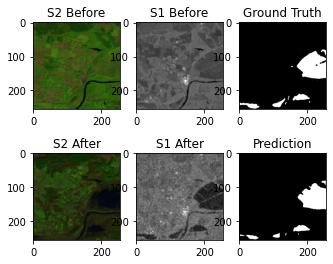

In [ ]:
index = 38
fig = plt.figure()
ax = fig.add_subplot(2, 3, 1)
imgplot = plt.imshow(x1_true[index],cmap=plt.cm.gray)
ax.set_title('S2 Before')
ax = fig.add_subplot(2, 3, 4)
imgplot = plt.imshow(x2_true[index],cmap=plt.cm.gray)
ax.set_title('S2 After')
ax = fig.add_subplot(2, 3, 2)
imgplot = plt.imshow(x3_true[index],cmap=plt.cm.gray)
ax.set_title('S1 Before')
ax = fig.add_subplot(2, 3, 5)
imgplot = plt.imshow(x4_true[index],cmap=plt.cm.gray)
ax.set_title('S1 After')
ax = fig.add_subplot(2, 3, 3)
imgplot = plt.imshow(y_true[index],cmap=plt.cm.gray)
ax.set_title('Ground Truth')
ax = fig.add_subplot(2, 3, 6)

plt.subplots_adjust(wspace=-0.2, hspace=0.5)
imgplot = plt.imshow(y_pred[index],cmap=plt.cm.gray)
ax.set_title('Prediction')

print("PA : ", str(round(pix_acc[index], 4 )) )
print("IoU : ", str(round(mean_IoU[index], 4 )) )
print("FWIoU : ", str(round(FW_IoU[index], 4 )) )


In [ ]:
save_path = '/content/drive/MyDrive/flood_mapping/NEW/2021/EVOIA/PREDICTIONS'

#model.save("/content/drive/MyDrive/flood_mapping/NEW/MULTIMODAL/50 EPOCHS/BATCH 12/BIb12e50.h5")
#import pickle
#with open(save_path + 'HistoryDict', 'wb') as file_pi:
 #      pickle.dump(FloodNet.history, file_pi)

y_pred =np.where(results[:,:,:,0]>.5,1,0)
lista = os.listdir('/content/drive/MyDrive/flood_mapping/NEW/2021/EVOIA/Sentinel2/AFTER')
lista.sort()
for i in range(0,len(lista)):
  im = Image.fromarray((y_pred[i]*255).astype(np.uint8))
  im.save(save_path + "/prediction"+ lista[i][-7:])


In [ ]:



savepath = "/content/drive/MyDrive/flood_mapping/NEW/2021/GUYANA/"
for i in best: 

##### SENTINEL 1 ###########################################
  array1 = x3_true[i]*255
  array1 = array1.astype(np.uint8)
  data = Image.fromarray(array1)       
  data.save(savepath + "Sentinel1/BEFORE/" + "imbefore_"+str(i)+".png")  

  array2 = x4_true[i]*255
  array2 = array2.astype(np.uint8)
  data = Image.fromarray(array2)       
  data.save(savepath + "Sentinel1/AFTER/" + "imafter_"+str(i)+".png")

  array3 = y_true[i]*255
  array3 = array3.astype(np.uint8)
  data = Image.fromarray(array3)       
  data.save(savepath + "Sentinel1/MASK/" + "gt_"+str(i)+".png")  

  ##### SENTINEL 2 ###########################################
  array1 = x1_true[i]*255
  array1 = array1.astype(np.uint8)
  data = Image.fromarray(array1)       
  data.save(savepath + "Sentinel2/BEFORE/" + "imbefore_"+str(i)+".png")  

  array2 = x2_true[i]*255
  array2 = array2.astype(np.uint8)
  data = Image.fromarray(array2)       
  data.save(savepath + "Sentinel2/AFTER/" + "imafter_"+str(i)+".png")

  array3 =y_true[i]*255
  array3 = array3.astype(np.uint8)
  data = Image.fromarray(array3)       
  data.save(savepath + "Sentinel2/MASK/" + "gt_"+str(i)+".png") 

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

stats = perf_measure(y_true[64].ravel(),y_pred[64].ravel())